# Sub-Nyquist sampling of acoustic signals based on chaotic compressed sensing

Domingo, Kenneth V.<br />
2015-03116

References:

[1] Mathew, M.R., and B. Premanand (2016). Sub-Nyquist sampling of acoustic signals based on chaotic compressed sampling. <i>Procedia Technology <b>24<b/></i>: 941-948.

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.fftpack as fft
import scipy.linalg as sla
import numpy.linalg as nla
import scipy.optimize as spo
import sklearn.linear_model as skl
import sklearn.metrics as skm
import sklearn.preprocessing as skp
import IPython.display as disp
import cvxpy as cvx
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mpl.use('nbAgg')
plt.style.use("seaborn")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (16/2, 9/2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [3]:
def GLmap(mu, x0, shape):
    x = np.zeros(shape, float)
    x[0] = x0
    for i in range(1, np.prod(shape)):
        x.flat[i] = mu*x.flat[i-1] * (1 - x.flat[i-1])
    x = np.log(x/(1 - x))
    return x

In [5]:
f = 330
dur = 1
samples = 2000
rate = samples/dur
t = np.linspace(0, 1, samples)
x = np.sin(2*np.pi*f*t)

In [43]:
comp_samples = 400
Phi = GLmap(4, 0.3, (comp_samples, samples))
Phi = 1/np.var(Phi)/np.sqrt(comp_samples) * Phi
ri = np.sort(rand.choice(samples, comp_samples, replace=False))
# Psi = np.stack([fft.dct(np.sin(2*np.pi*f*t)) for f in ri])
Psi = fft.dct(np.identity(samples), norm='ortho')
y = x[ri]
ty = t[ri]

<IPython.core.display.Javascript object>


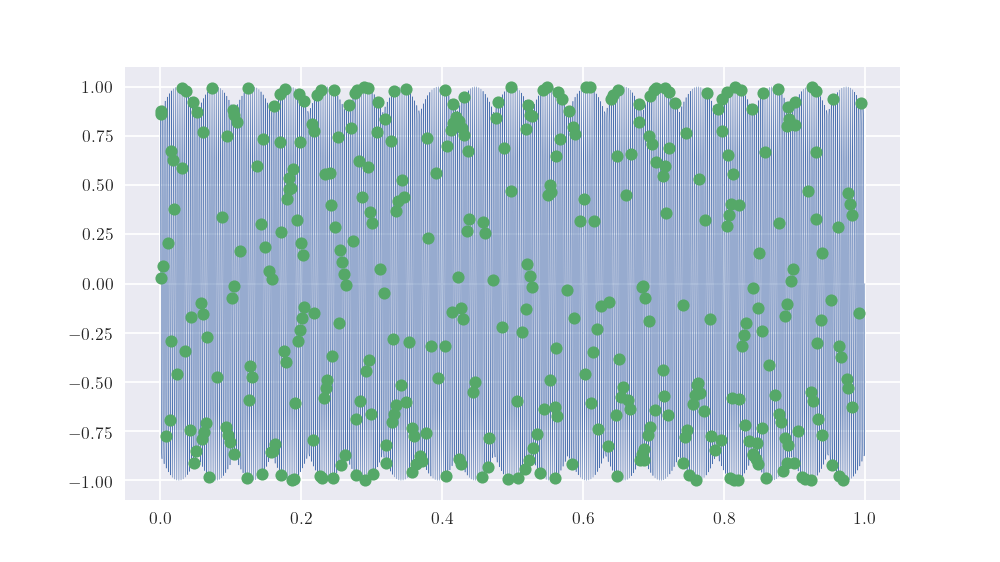

In [44]:
plt.plot(t, x, lw=0.3, alpha=1)
plt.plot(ty, y, 'o')
plt.show()

In [45]:
c = fft.dct(x)

In [46]:
prob = skl.OrthogonalMatchingPursuitCV(cv=5, verbose=1)
Theta = Phi @ Psi
prob.fit(Theta, y)
yhat = fft.idct(prob.coef_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


<IPython.core.display.Javascript object>


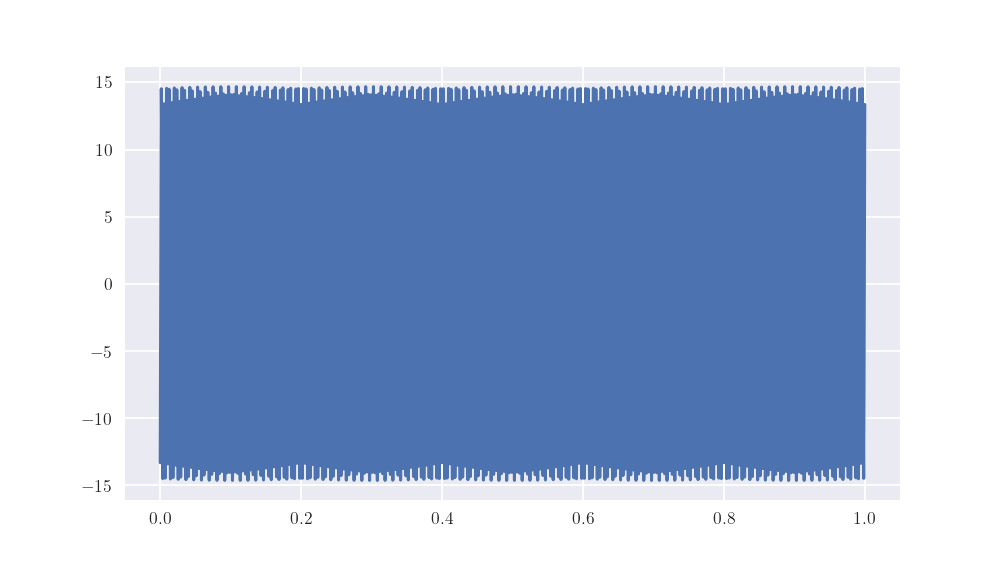

In [47]:
plt.plot(t, yhat)
plt.show()

<IPython.core.display.Javascript object>


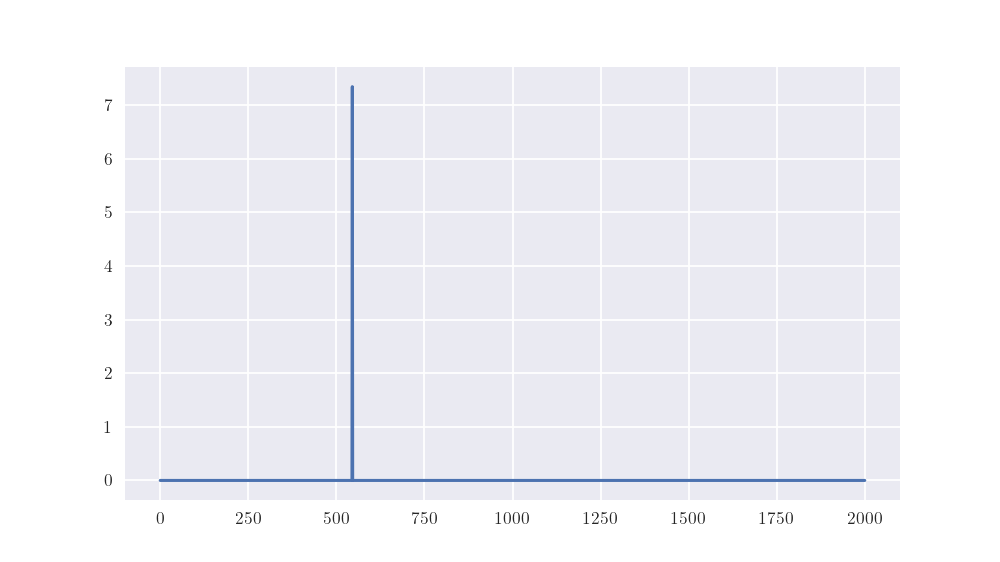

In [48]:
fs = np.linspace(0, samples, samples)
plt.plot(fs, abs(prob.coef_))
plt.show()

In [22]:
skm.mean_squared_error(x, yhat)

0.540965027643345